# Throughput

## Import Data

In [1]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)
pd.set_option('display.max_rows', 100)

In [2]:
data_frames = []

for file in glob.glob("*_1.pausetimes.summary.bench"):
    with open(file) as f:
        data = []
        # From https://github.com/tarides/runtime_events_tools/blob/f080e98158183fce241625e6c3903bf9286b501c/bin/olly.ml#L23-L43
        percentiles = [25.0, 50.0, 60.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.9, 99.99, 99.999, 99.9999, 100.0]
        for l in f:
            temp = json.loads(l)
            if 'name' in temp:
                for p, l in zip(percentiles, temp['distr_latency']):
                    temp['latency_'+str(p)] = l
                del temp['distr_latency']
                data.append(temp)
        df = pd.json_normalize(data)
        df['variant'] = file.replace("_1.pausetimes.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
df

,name,mean_latency,max_latency,latency_25.0,latency_50.0,latency_60.0,latency_70.0,latency_75.0,latency_80.0,latency_85.0,...,latency_96.0,latency_97.0,latency_98.0,latency_99.0,latency_99.9,latency_99.99,latency_99.999,latency_99.9999,latency_100.0,variant
1,LU_decomposition.1024,0,0,0.000263,0.001175,0.001287,0.001471,0.004159,0.004383,0.004511,...,0.004943,0.005039,0.005295,0.006935,0.013511,0.090559,0.184703,0.184703,0.184703,with_background
1,LU_decomposition.1024,0,0,0.000223,0.000895,0.000959,0.000991,0.000999,0.001015,0.001063,...,0.001215,0.001231,0.001367,0.003935,0.009287,0.146175,0.150527,0.150527,0.150527,baseline
1,LU_decomposition.1024,2,24,0.103487,0.133887,0.244351,0.248703,0.349951,4.997119,12.369919,...,12.926975,13.189119,13.205503,13.213695,18.464767,23.379967,24.379391,24.379391,24.379391,no_sleep
10,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000247,0.001319,0.001495,0.003479,0.004527,0.004655,0.004759,...,0.008167,0.008639,0.009695,0.012039,0.128063,0.149887,0.149887,0.149887,0.149887,with_background
10,big_array_bench.big_array_int32_rev_1024_50000,0,0,0.000327,0.001135,0.001183,0.001223,0.001247,0.001279,0.001407,...,0.004431,0.004583,0.004687,0.004935,0.057343,0.058815,0.058815,0.058815,0.058815,baseline
10,big_array_bench.big_array_int32_rev_1024_50000,2,23,0.103871,0.136063,0.244863,0.248959,0.350207,6.230015,12.222463,...,12.926975,13.197311,13.205503,13.213695,15.925247,23.003135,23.003135,23.003135,23.003135,no_sleep
9,big_array_bench.big_array_int_rev_1024_50000,3,29,0.107903,0.244223,0.257407,0.350207,8.929279,8.953855,9.199615,...,22.102015,22.118399,22.134783,22.134783,29.130751,29.130751,29.130751,29.130751,29.130751,no_sleep
9,big_array_bench.big_array_int_rev_1024_50000,0,0,0.004295,0.005879,0.005879,0.048287,0.048287,0.048287,0.048287,...,0.065919,0.065919,0.065919,0.065919,0.065919,0.065919,0.065919,0.065919,0.065919,baseline
9,big_array_bench.big_array_int_rev_1024_50000,0,0,0.000863,0.004151,0.004151,0.008615,0.008615,0.008615,0.008615,...,0.044831,0.044831,0.044831,0.044831,0.044831,0.044831,0.044831,0.044831,0.044831,with_background
11,fft.,0,48,0.302591,0.454399,0.462591,0.472831,0.481535,0.493311,0.508927,...,0.715263,0.723967,0.829951,1.190911,2.832383,48.300031,48.300031,48.300031,48.300031,baseline


<hr>

### (USER INPUT)  Baseline variant name

Please choose the baseline variant name for normalized graphs:

In [3]:
baseline = 'baseline'

Ensure that the baseline is one of the variants. Returns Raises `ValueError` if the baseline is not present in the loaded data:

In [4]:
is_present = df["variant"].unique().tolist().index(baseline)

<hr>

## Latency (max)

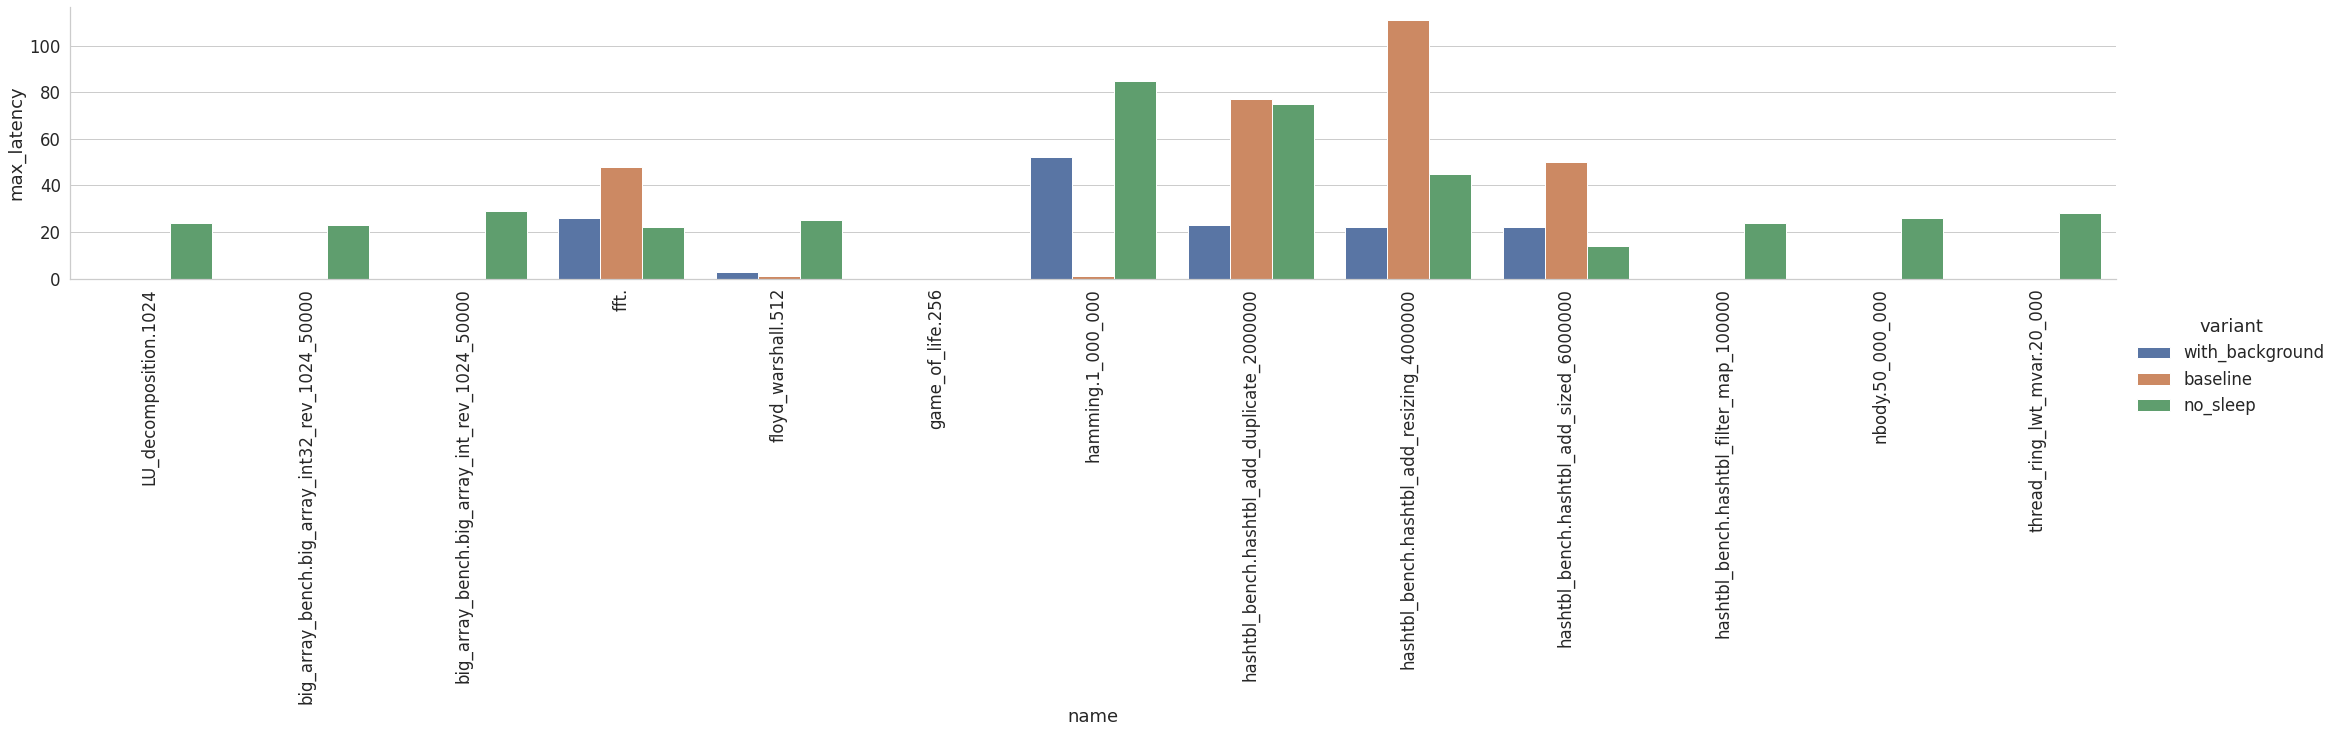

In [5]:
g = sns.catplot (x='name', y='max_latency', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

## Latency (99%)

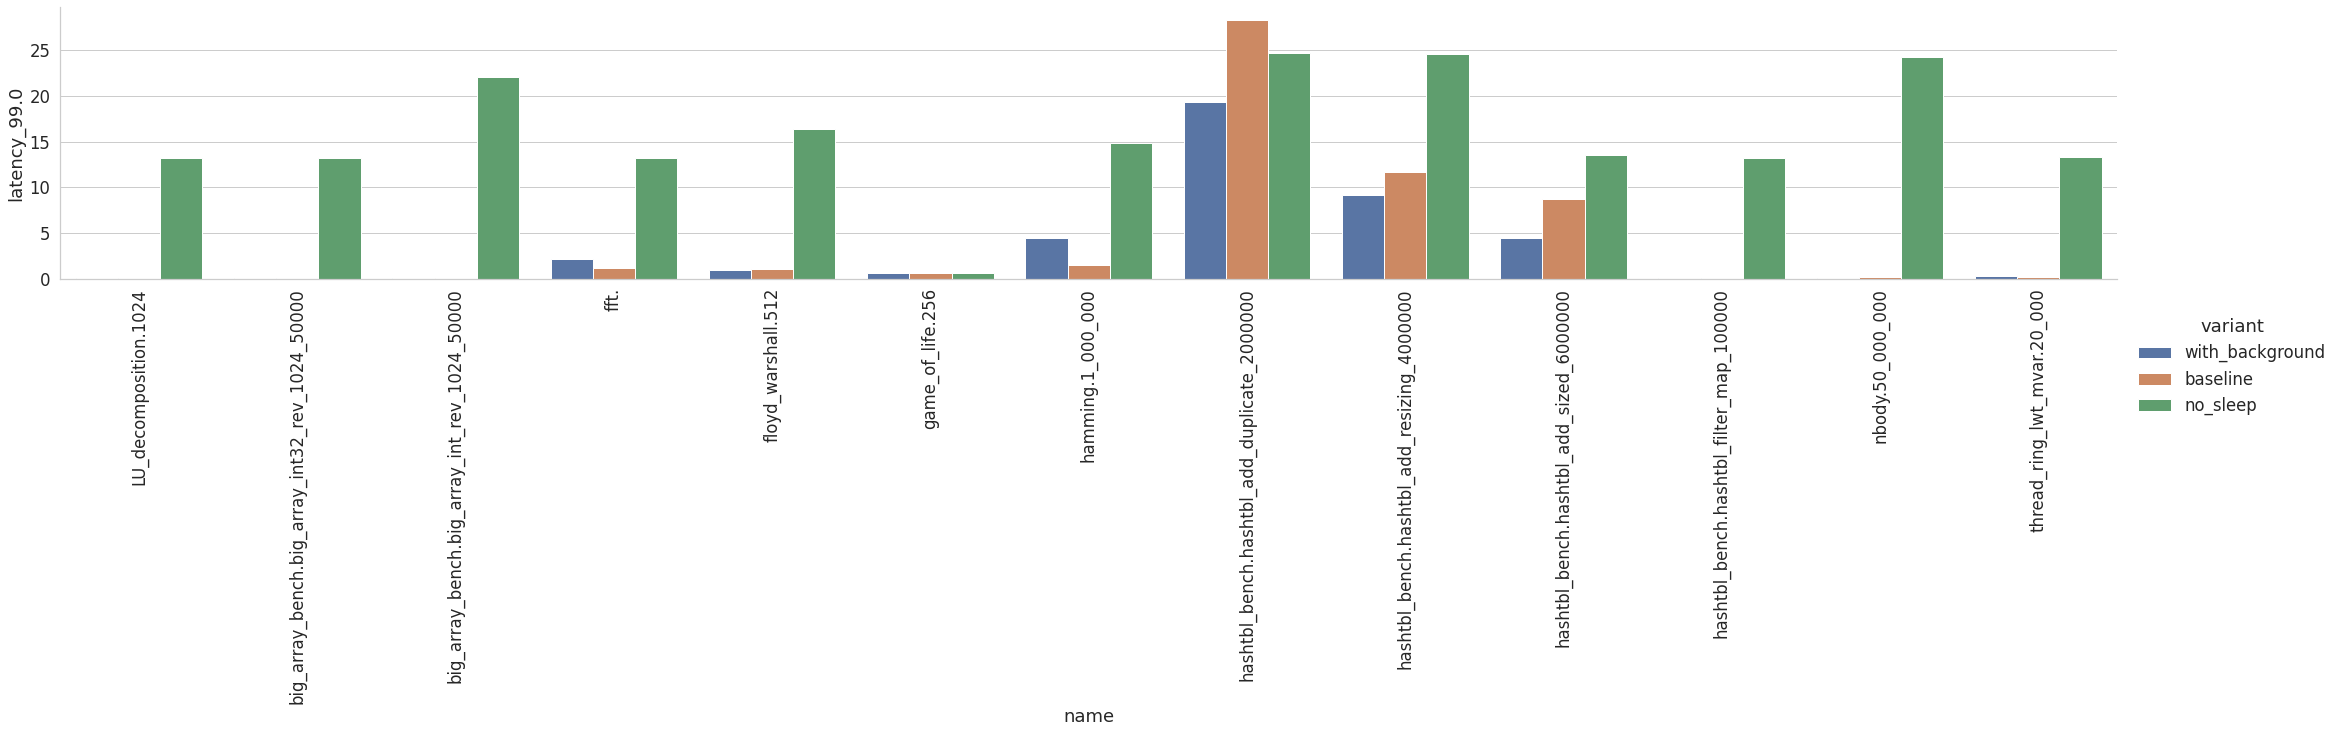

In [6]:
g = sns.catplot (x='name', y='latency_99.0', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

## Latency (90%)

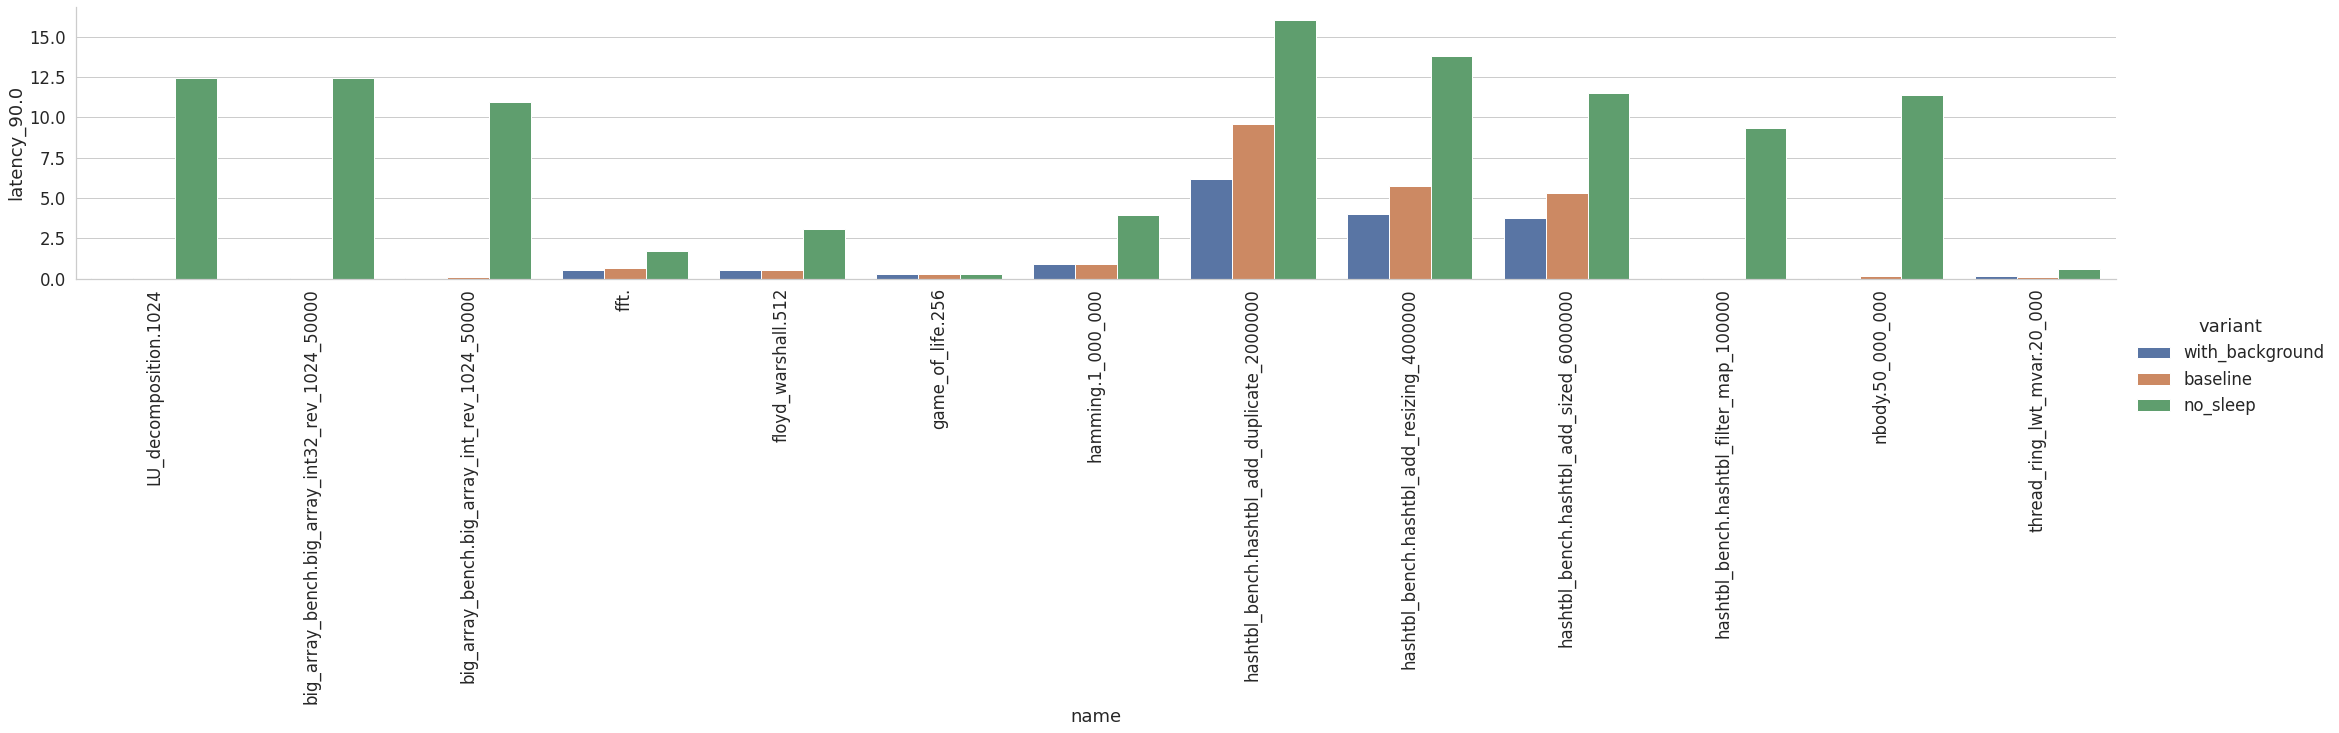

In [7]:
g = sns.catplot (x='name', y='latency_90.0', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)